In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
original = pd.read_excel("ae_sort_asin.xlsx")
original=original.fillna("missing")
original["specific (Node ID)"] =original["specific (Node ID)"].astype(str)

In [64]:
original["target_gv_band"].describe()

count    73367.000000
mean         1.344119
std          4.428203
min          0.000000
25%          0.120000
50%          0.337838
75%          1.038462
max        315.400000
Name: gv/impression, dtype: float64

In [69]:
original["gl_desc"].nunique()

31

In [79]:
original["target_gv_band"].value_counts(normalize= True)

E    0.317500
D    0.267177
C    0.175965
B    0.113144
F    0.080022
A    0.046192
Name: target_gv_band, dtype: float64

In [ ]:
original.dtypes

In [3]:
def remove_autorefinement(x):
    x =  re.sub('15695812031;', '', x.strip())
    x =  re.sub(';15695812031', '', x.strip())
    return x

In [4]:
#remove automated refinement from specifc
original["specific (Node ID)"] = original["specific (Node ID)"].apply(lambda x : remove_autorefinement(x))

# for index, row in original.iterrows():
#     original.iloc[index]["specific (Node ID)"] = re.sub('15695812031;', '', row["specific (Node ID)"])
#     original.iloc[index]["specific (Node ID)"] = re.sub(';15695812031', '', row["specific (Node ID)"])

In [ ]:
original["specific (Node ID)"].unique()

In [8]:
original.set_index(['specific (Node ID)','brand'])

gs_arc        ASIN   gl_desc target_gv_band  \
specific (Node ID)      brand                                                   
15415002031             غير معروف  US-AE  B08C5BHWDF  Wireless              A   
                        غير معروف  US-AE  B08CXR2CFR  Wireless              B   
                        غير معروف  US-AE  B08CXR4PMR  Wireless              B   
                        غير معروف  US-AE  B08CXXPCFF  Wireless              D   
                        غير معروف  US-AE  B08C5BCJRG  Wireless              A   
...                                  ...         ...       ...            ...   
11996624031             #followme  US-AE  B0714MY3ZB   Apparel              E   
11995889031;12066933031 #followme  US-AE  B071VM4TD1   Apparel              D   
                        #followme  US-AE  B01I0R6ALM   Apparel              D   
11497632031             #followme  US-AE  B07G8J9X4H   Apparel              D   
missing                 missing    US-AE  B083K27W4G   Apparel              C   

                                   target_glance_view_count  \
specific (Node ID)      brand                                 
15415002031             غير معروف                       811   
                        غير معروف                       635   
                        غير معروف                       194   
                        غير معروف                        84   
                        غير معروف                       425   
...                                                     ...   
11996624031             #followme                         7   
11995889031;12066933031 #followme                        25   
                        #followme                         8   
11497632031             #followme                         7   
missing                 missing                          34   

                                   target_impression_count  gv/impression  \
specific (Node ID)      brand                                               
15415002031             غير معروف                     1202       0.674709   
                        غير معروف                     1465       0.433447   
                        غير معروف                      202       0.960396   
                        غير معروف                       41       2.048780   
                        غير معروف                     1896       0.224156   
...                                                    ...            ...   
11996624031             #followme                       16       0.437500   
11995889031;12066933031 #followme                        4       6.250000   
                        #followme                        1       8.000000   
11497632031             #followme                        4       1.750000   
missing                 missing                          6       5.666667   

                                                                            specific  \
specific (Node ID)      brand                                                          
15415002031             غير معروف  Electronics/Categories/Mobile Phones & Communi...   
                        غير معروف  Electronics/Categories/Mobile Phones & Communi...   
                        غير معروف  Electronics/Categories/Mobile Phones & Communi...   
                        غير معروف  Electronics/Categories/Mobile Phones & Communi...   
                        غير معروف  Electronics/Categories/Mobile Phones & Communi...   
...                                                                              ...   
11996624031             #followme  Fashion/Categories/Men/Clothing/Nightwear/Ones...   
11995889031;12066933031 #followme  Fashion/Categories/Women/Accessories (11995889...   
                        #followme  Fashion/Categories/Women/Accessories (11995889...   
11497632031             #followme                   Fashion/Categories (11497632031)   
missing                 missing                                         INVALID ASIN   

             

In [36]:
original.reset_index().to_excel("ae_sort_asin_modified.xlsx", encoding = 'utf-8')

In [6]:
#create np percentile function for agg
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n,interpolation = 'midpoint')
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [7]:
original_1 = original.reset_index().groupby(['specific (Node ID)','brand'])['target_glance_view_count'].agg({np.mean,np.size,np.min,np.max,np.median,percentile(25),percentile(75)}).rename(columns={np.mean:'gv_average',np.size:'size',np.min:'gv_min',np.max:'gv_max',np.median:'gv_median',percentile(25):'25%',percentile(75):'75%'})

In [8]:
original_1['IQR'] = original_1['percentile_75']-original_1['percentile_25']
original_1['Upper'] = original_1['percentile_75']+original_1['IQR']*1.5
original_1['Lower'] = original_1['percentile_75']-original_1['IQR']*1.5

In [9]:
original_1.sort_values(by=['specific (Node ID)','size'], ascending=False)

amax  median  percentile_75  \
specific (Node ID)      brand                                                
missing                 missing                4896    18.0           65.5   
                        TechWare Pro             29     6.5           20.5   
                        HAUS AND HUES            20    17.0           18.5   
                        nicebottles              15    15.0           15.0   
                        Better                  116   116.0          116.0   
...                                             ...     ...            ...   
11497631031;12050466031 Kinmac                    0     0.0            0.0   
11497631031;12050464031 Kenneth Cole REACTION   318   318.0          318.0   
11497631031;12050462031 Solo New York           656   656.0          656.0   
11497631031;11497860031 OOOUSE                    2     2.0            2.0   
11497631031             Funny Party Hats         16    14.5           14.5   

                                               size        mean  \
specific (Node ID)      brand                                     
missing                 missing                 206  112.043689   
                        TechWare Pro              4   10.500000   
                        HAUS AND HUES             3   15.333333   
                        nicebottles               3   15.000000   
                        Better                    2  116.000000   
...                                             ...         ...   
11497631031;12050466031 Kinmac                    2    0.000000   
11497631031;12050464031 Kenneth Cole REACTION     1  318.000000   
11497631031;12050462031 Solo New York             1  656.000000   
11497631031;11497860031 OOOUSE                    1    2.000000   
11497631031             Funny Party Hats          2   14.500000   

                                               percentile_25  amin   IQR  \
specific (Node ID)      brand                                              
missing                 missing                          4.0     0  61.5   
                        TechWare Pro                     0.5     0  20.0   
                        HAUS AND HUES                   13.0     9   5.5   
                        nicebottles                     15.0    15   0.0   
                        Better                         116.0   116   0.0   
...                                                      ...   ...   ...   
11497631031;12050466031 Kinmac                           0.0     0   0.0   
11497631031;12050464031 Kenneth Cole REACTION          318.0   318   0.0   
11497631031;12050462031 Solo New York                  656.0   656   0.0   
11497631031;11497860031 OOOUSE                           2.0     2   0.0   
11497631031             Funny Party Hats                14.5    13   0.0   

                                                Upper   Lower  
specific (Node ID)      brand                                  
missing                 missing                157.75  -26.75  
                        TechWare Pro            50.50   -9.50  
                        HAUS AND HUES           26.75   10.25  
                        nicebottles             15.00   15.00  
                        Better                 116.00  116.00  
...                                               ...     ...  
11497631031;12050466031 Kinmac                   0.00    0.00  
11497631031;12050464031 Kenneth Cole REACTION  318.00  318.00  
11497631031;12050462031 Solo New York          656.00  656.00  
11497631031;11497860031 OOOUSE                   2.00    2.00  
11497631031             Funny Party Hats        14.50   14.50  

[37833 rows x 10 columns]

In [11]:
original_1.reset_index().to_excel('original.xlsx', encoding = 'utf-8')

In [40]:
#summary statistics of specific (Node ID)-brand level groupby data
original_1['size'].describe()

count    37833.000000
mean         1.939233
std          3.843756
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        206.000000
Name: size, dtype: float64

In [12]:
bins = [0,5,10,20,50,100,150,200,250,300,400,500]

In [24]:
original_1['size_binned'] = pd.cut(original_1['size'],bins)
original_1["size_binned"].value_counts(normalize= False,sort = False) 

(0, 5]        36086
(5, 10]        1113
(10, 20]        434
(20, 50]        170
(50, 100]        25
(100, 150]        1
(150, 200]        2
(200, 250]        2
(250, 300]        0
(300, 400]        0
(400, 500]        0
Name: size_binned, dtype: int64

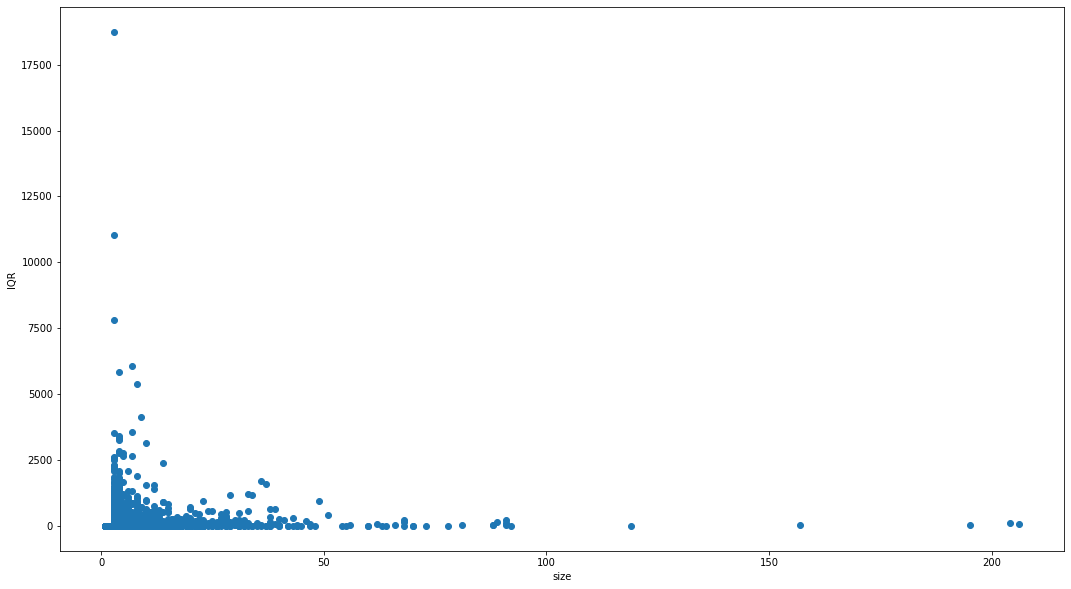

In [20]:
fig, ax = plt.subplots(figsize = (18,10)) 
ax.scatter(original_1['size'], original_1['IQR']) 
ax.set(xlabel='size', ylabel='IQR')
plt.show()

In [23]:
original_1.groupby('size_binned')["IQR"].mean()

size_binned
(0, 5]         11.595771
(5, 10]       113.285714
(10, 20]       92.520737
(20, 50]      144.773529
(50, 100]      71.660000
(100, 150]      3.500000
(150, 200]     23.500000
(200, 250]     96.000000
(250, 300]           NaN
(300, 400]           NaN
(400, 500]           NaN
Name: IQR, dtype: float64

In [25]:
# by specifc level only
original_2 = original.reset_index().groupby(['specific (Node ID)'])['target_glance_view_count'].agg({np.mean,np.size,np.min,np.max,np.median,percentile(25),percentile(75)}).rename(columns={np.mean:'gv_average',np.size:'size',np.min:'gv_min',np.max:'gv_max',np.median:'gv_median',percentile(25):'25%',percentile(75):'75%'})

In [26]:
original_2['IQR'] = original_2['percentile_75']-original_2['percentile_25']
original_2['Upper'] = original_2['percentile_75']+original_2['IQR']*1.5
original_2['Lower'] = original_2['percentile_75']-original_2['IQR']*1.5

In [27]:
original_2.reset_index().to_excel('original_2.xlsx', encoding = 'utf-8')

In [28]:
original_2['size_binned'] = pd.cut(original_2['size'],bins)
original_2["size_binned"].value_counts(normalize= False,sort = False)

(0, 5]        6477
(5, 10]        820
(10, 20]       589
(20, 50]       478
(50, 100]      165
(100, 150]      47
(150, 200]      20
(200, 250]      14
(250, 300]       5
(300, 400]      10
(400, 500]       4
Name: size_binned, dtype: int64

In [29]:
original_2.groupby('size_binned')["IQR"].mean()

size_binned
(0, 5]         26.733673
(5, 10]       113.367683
(10, 20]       97.381154
(20, 50]       84.490586
(50, 100]      73.557576
(100, 150]    104.404255
(150, 200]    143.175000
(200, 250]     79.928571
(250, 300]     50.800000
(300, 400]     78.250000
(400, 500]     40.875000
Name: IQR, dtype: float64

In [43]:
#summary statistics of specific (Node ID) level groupby data
original_2['size'].describe()

count    8631.000000
mean        8.500406
std        27.289143
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1033.000000
Name: size, dtype: float64

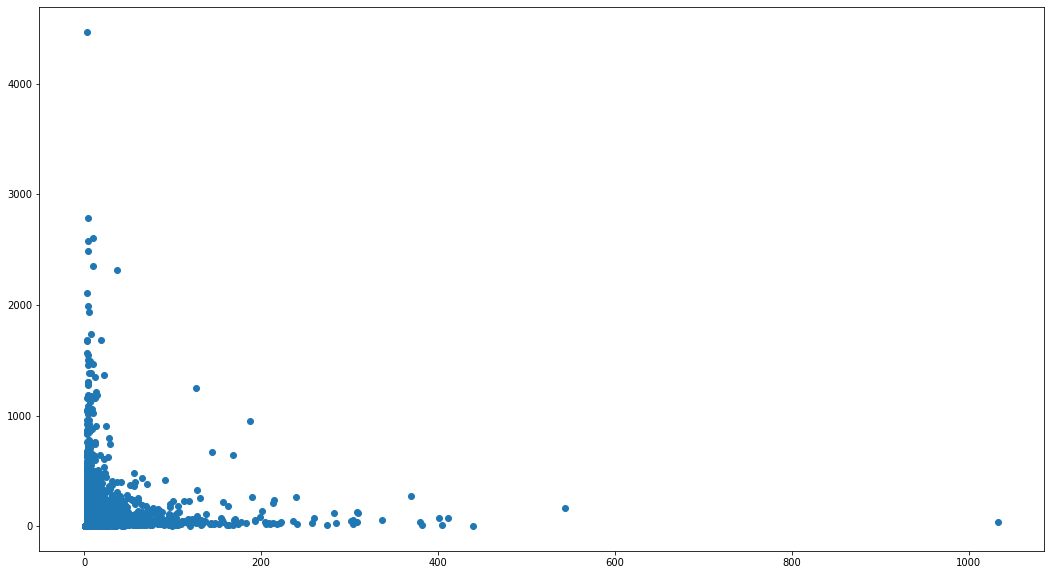

In [47]:
fig, ax = plt.subplots(figsize = (18,10)) 
ax.scatter(original_2['size'], original_2['IQR']) 
plt.show()

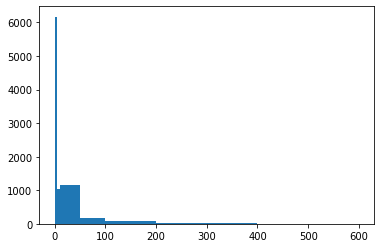

In [57]:
plt.hist(original_2['size'], bins = [0,5,10,50,100,200,300,400,500,600])
plt.show()

In [30]:
# by gl-brand level groupby data
original_3 = original.reset_index().groupby(['gl_desc','brand'])['target_glance_view_count'].agg({np.mean,np.size,np.min,np.max,np.median,percentile(25),percentile(75)}).rename(columns={np.mean:'gv_average',np.size:'size',np.min:'gv_min',np.max:'gv_max',np.median:'gv_median',percentile(25):'25%',percentile(75):'75%'})

In [31]:
original_3['IQR'] = original_3['percentile_75']-original_3['percentile_25']
original_3['Upper'] = original_3['percentile_75']+original_3['IQR']*1.5
original_3['Lower'] = original_3['percentile_75']-original_3['IQR']*1.5

In [51]:
original_3['size'].describe()

count    25782.000000
mean         2.845668
std          9.265741
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        791.000000
Name: size, dtype: float64

In [32]:
original_3.reset_index().to_excel('original_3.xlsx', encoding = 'utf-8')

In [33]:
original_3['size_binned'] = pd.cut(original_3['size'],bins)
original_3["size_binned"].value_counts(normalize= False,sort = False)

(0, 5]        23606
(5, 10]        1180
(10, 20]        582
(20, 50]        294
(50, 100]        89
(100, 150]       15
(150, 200]       11
(200, 250]        2
(250, 300]        1
(300, 400]        1
(400, 500]        0
Name: size_binned, dtype: int64

In [34]:
original_3.groupby('size_binned')["IQR"].mean()

size_binned
(0, 5]         15.316085
(5, 10]        79.810593
(10, 20]      121.790378
(20, 50]      110.921769
(50, 100]     160.117978
(100, 150]    138.666667
(150, 200]    141.318182
(200, 250]     96.250000
(250, 300]     29.000000
(300, 400]     45.500000
(400, 500]           NaN
Name: IQR, dtype: float64

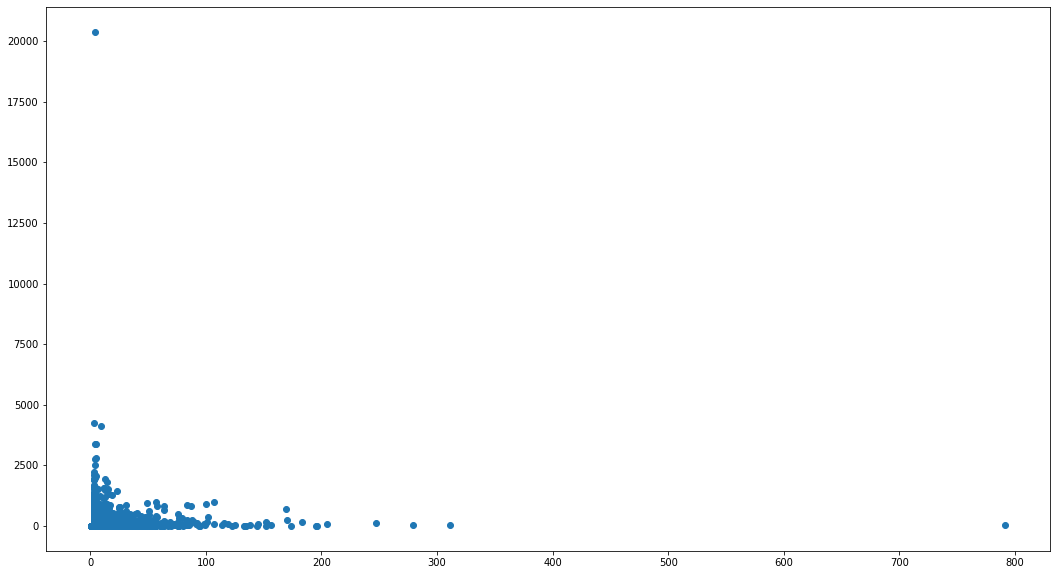

In [53]:
fig, ax = plt.subplots(figsize = (18,10)) 
ax.scatter(original_3['size'], original_3['IQR']) 
plt.show()

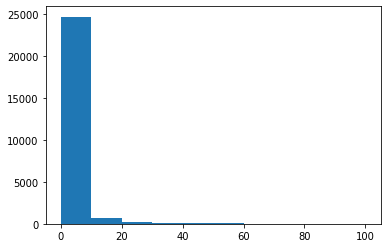

In [55]:
plt.hist(original_3['size'], bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.show()